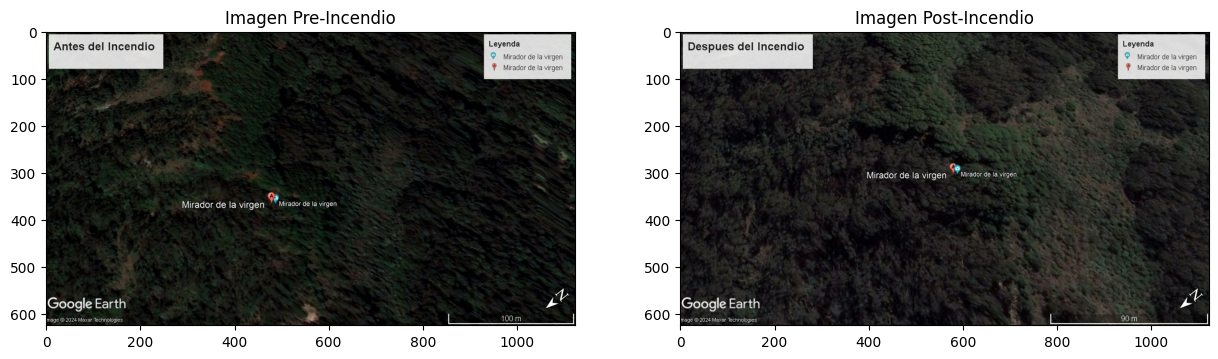

In [84]:
import cv2  # OpenCV para procesamiento de imágenes
import numpy as np  # NumPy para operaciones numéricas
import matplotlib.pyplot as plt  # Matplotlib para visualización

def display_fire_images(img_pre_fire, img_post_fire):
    """
    Display images before and after a fire incident.

    Parameters:
        img_pre_fire (numpy.ndarray): Image before the fire incident.
        img_post_fire (numpy.ndarray): Image after the fire incident.

    Returns:
        None
    """
    # Crear una figura para mostrar las imágenes
    plt.figure(figsize=(15, 5))

    # Mostrar la imagen antes del incendio
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img_pre_fire, cv2.COLOR_BGR2RGB))
    plt.title('Imagen Pre-Incendio')

    # Mostrar la imagen después del incendio
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(img_post_fire, cv2.COLOR_BGR2RGB))
    plt.title('Imagen Post-Incendio')

    # Mostrar las imágenes en la figura
    plt.show()

# Cargar las imágenes previamente definidas
img_pre_fire = cv2.imread('AntesIncendio.jpg')
img_post_fire = cv2.imread('despuesIncendio.jpg')

# Mostrar las imágenes antes y después del incendio
display_fire_images(img_pre_fire, img_post_fire)



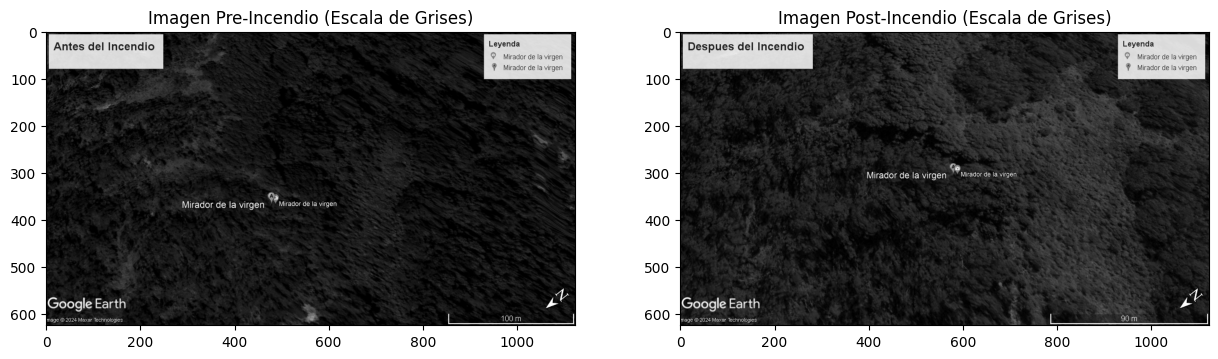

In [85]:
# Convertir las imágenes a escala de grises
def convert_to_gray_scale(img_pre_fire, img_post_fire):
    """
    Convert images to grayscale.

    Parameters:
        img_pre_fire (numpy.ndarray): Image before the incident.
        img_post_fire (numpy.ndarray): Image after the incident.

    Returns:
        tuple: A tuple containing grayscale images (gray_pre_fire, gray_post_fire).
    """
    gray_pre_fire = cv2.cvtColor(img_pre_fire, cv2.COLOR_BGR2GRAY)
    gray_post_fire = cv2.cvtColor(img_post_fire, cv2.COLOR_BGR2GRAY)
    return gray_pre_fire, gray_post_fire

# Visualizar las imágenes en escala de grises
def display_gray_scale_images(gray_pre_fire, gray_post_fire):
    """
    Display grayscale images before and after an incident.

    Parameters:
        gray_pre_fire (numpy.ndarray): Grayscale image before the incident.
        gray_post_fire (numpy.ndarray): Grayscale image after the incident.

    Returns:
        None
    """
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(gray_pre_fire, cmap='gray')
    plt.title('Imagen Pre-Incendio (Escala de Grises)')

    plt.subplot(1, 2, 2)
    plt.imshow(gray_post_fire, cmap='gray')
    plt.title('Imagen Post-Incendio (Escala de Grises)')

    plt.show()

# Convertir las imágenes a escala de grises
gray_pre_fire, gray_post_fire = convert_to_gray_scale(img_pre_fire, img_post_fire)

# Visualizar las imágenes en escala de grises
display_gray_scale_images(gray_pre_fire, gray_post_fire)





**BORDES**

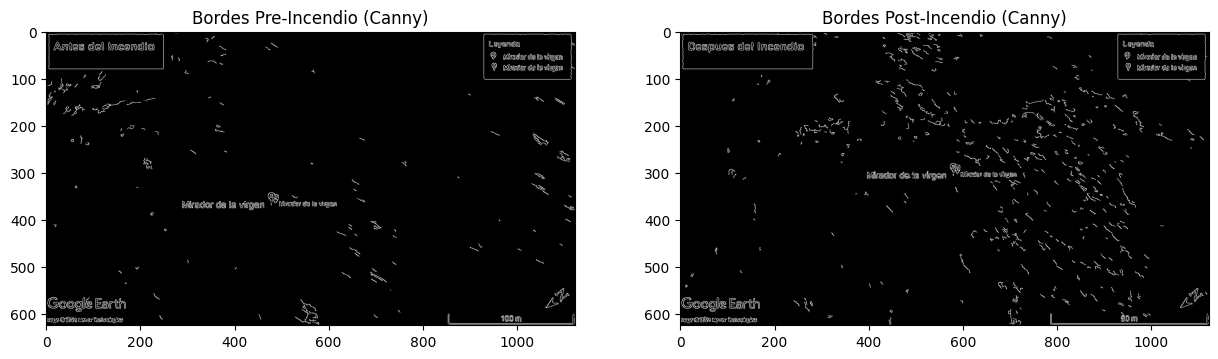

In [86]:
def apply_canny_edge_detection(gray_pre_fire, gray_post_fire):
    """
    Apply the Canny edge detection filter to grayscale images.

    Parameters:
        gray_pre_fire (numpy.ndarray): Grayscale image before the incident.
        gray_post_fire (numpy.ndarray): Grayscale image after the incident.

    Returns:
        tuple: A tuple containing edge-detected images (edges_pre_fire, edges_post_fire).
    """
    # Aplicar el filtro Canny para la detección de bordes
    edges_pre_fire = cv2.Canny(gray_pre_fire, 100, 200)
    edges_post_fire = cv2.Canny(gray_post_fire, 100, 200)
    return edges_pre_fire, edges_post_fire

def display_canny_edges(edges_pre_fire, edges_post_fire):
    """
    Display the edges detected using Canny edge detection filter.

    Parameters:
        edges_pre_fire (numpy.ndarray): Edge-detected image before the incident.
        edges_post_fire (numpy.ndarray): Edge-detected image after the incident.

    Returns:
        None
    """
    plt.figure(figsize=(15, 5))  # Crear una figura de tamaño 15x5 pulgadas

    # Mostrar los bordes antes del incendio
    plt.subplot(1, 2, 1)
    plt.imshow(edges_pre_fire, cmap='gray')
    plt.title('Bordes Pre-Incendio (Canny)')

    # Mostrar los bordes después del incendio
    plt.subplot(1, 2, 2)
    plt.imshow(edges_post_fire, cmap='gray')
    plt.title('Bordes Post-Incendio (Canny)')

    # Mostrar las imágenes en la figura
    plt.show()

# Aplicar el filtro Canny para la detección de bordes
edges_pre_fire, edges_post_fire = apply_canny_edge_detection(gray_pre_fire, gray_post_fire)

# Visualizar los resultados
display_canny_edges(edges_pre_fire, edges_post_fire)



 * **Imagen Pre-Incendio:** La imagen pre-incendio muestra menos bordes dispersos por toda la imagen. Los bordes son más definidos en áreas específicas, probablemente debido a la presencia de vegetación densa y otras características del terreno.

 * **Imagen Post-Incendio:** La imagen post-incendio muestra una mayor cantidad de bordes dispersos, lo que indica un cambio significativo en la textura del terreno. Esto puede ser consecuencia del incendio, que ha alterado la vegetación y la superficie del suelo, creando más contrastes y bordes.

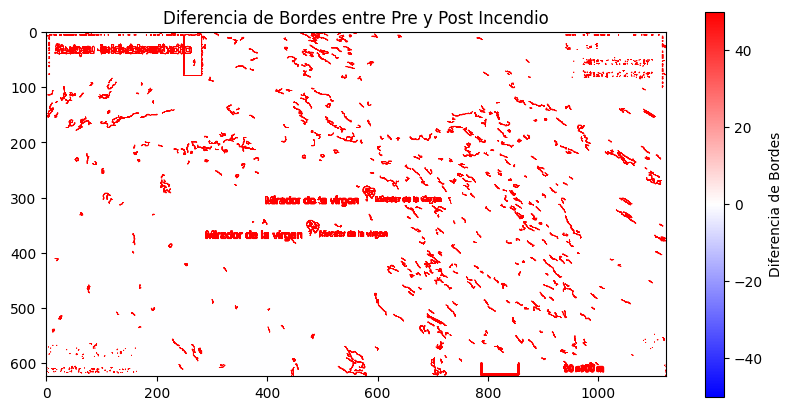

In [87]:
def calculate_edge_difference(edges_pre_fire, edges_post_fire, umbral):
    """
    Calculate the difference of edges between pre-fire and post-fire images.

    Parameters:
        edges_pre_fire (numpy.ndarray): Edge-detected image before the incident.
        edges_post_fire (numpy.ndarray): Edge-detected image after the incident.
        umbral (int): Threshold value to apply to the edge difference.

    Returns:
        numpy.ndarray: Thresholded edge difference image.
    """
    # Se calcula la diferencia de bordes entre las imágenes previamente procesadas
    edge_diff = cv2.absdiff(edges_pre_fire, edges_post_fire)

    # Se aplica el umbral a la diferencia de bordes
    _, edge_diff_thresholded = cv2.threshold(edge_diff, umbral, 255, cv2.THRESH_BINARY)
    return edge_diff_thresholded

# Se define el umbral para aplicar en el proceso
umbral = 50

# Se calcula la diferencia de bordes entre las imágenes previamente procesadas
edge_diff_thresholded = calculate_edge_difference(edges_pre_fire, edges_post_fire, umbral)

# Se visualiza la diferencia de bordes con una escala de colores divergente
plt.figure(figsize=(10, 5))
plt.imshow(edge_diff_thresholded, cmap='bwr', vmin=-umbral, vmax=umbral)
plt.colorbar(label='Diferencia de Bordes')
plt.title('Diferencia de Bordes entre Pre y Post Incendio')
plt.show()



**Calculo NBR**

In [88]:
def calculate_nbr(image):
    """
    Calculate the Normalized Burn Ratio (NBR) index.

    Parameters:
        image (numpy.ndarray): Input image containing near-infrared (NIR) and shortwave infrared (SWIR) bands.

    Returns:
        numpy.ndarray: NBR index calculated from the input image.
    """
    nir_band = image[:, :, 1].astype(np.float32)  # Near-Infrared Band
    swir_band = image[:, :, 2].astype(np.float32)  # Shortwave Infrared Band
    return (nir_band - swir_band) / (nir_band + swir_band)

# Calculate the NBR index for pre and post-fire images
nbr_pre_fire = calculate_nbr(img_pre_fire)
nbr_post_fire = calculate_nbr(img_post_fire)



<ipython-input-88-fdaae37ce3a5>:13: RuntimeWarning: invalid value encountered in divide
  return (nir_band - swir_band) / (nir_band + swir_band)


In [89]:
def calculate_fire_severity(nbr_pre_fire, nbr_post_fire):
    """
    Calculate the severity of the fire incident (difference between pre-fire and post-fire NBR).

    Parameters:
        nbr_pre_fire (numpy.ndarray): NBR index calculated from the image before the fire incident.
        nbr_post_fire (numpy.ndarray): NBR index calculated from the image after the fire incident.

    Returns:
        numpy.ndarray: Severity index calculated as the difference between pre-fire and post-fire NBR.
    """
    # Calcular la severidad del incendio (diferencia entre NBR pre y post incendio)
    severity_index = nbr_pre_fire - nbr_post_fire
    return severity_index

# Calcular la severidad del incendio
severity_index = calculate_fire_severity(nbr_pre_fire, nbr_post_fire)


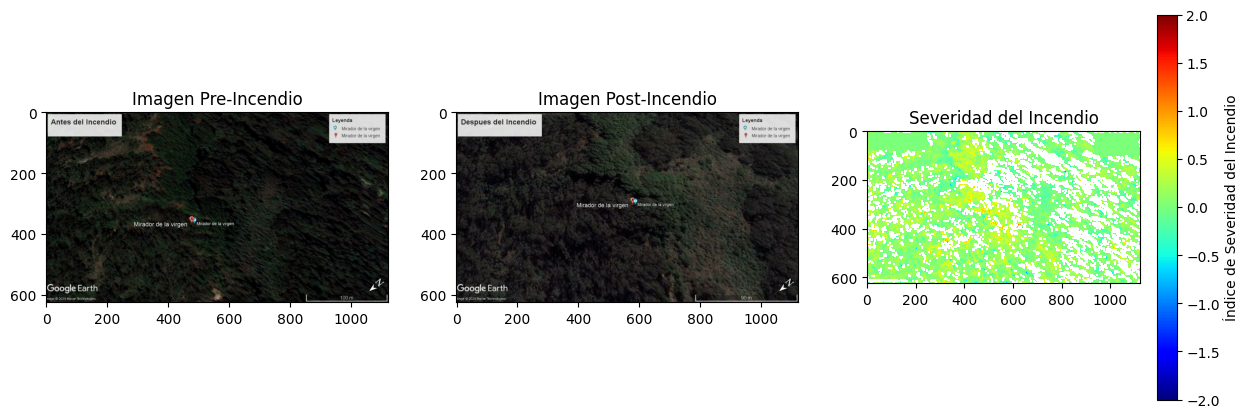

In [90]:
def display_fire_results(img_pre_fire, img_post_fire, severity_index):
    """
    Display the results of fire analysis, including pre-fire and post-fire images,
    and severity index.

    Parameters:
        img_pre_fire (numpy.ndarray): Image before the fire incident.
        img_post_fire (numpy.ndarray): Image after the fire incident.
        severity_index (numpy.ndarray): Severity index calculated from pre-fire and post-fire NBR.

    Returns:
        None
    """
    # Visualizar los resultados
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(img_pre_fire, cv2.COLOR_BGR2RGB))
    plt.title('Imagen Pre-Incendio')

    plt.subplot(1, 3, 2)
    plt.imshow(cv2.cvtColor(img_post_fire, cv2.COLOR_BGR2RGB))
    plt.title('Imagen Post-Incendio')

    plt.subplot(1, 3, 3)
    plt.imshow(severity_index, cmap='jet')
    plt.colorbar(label='Índice de Severidad del Incendio')
    plt.title('Severidad del Incendio')

    plt.show()

# Visualizar los resultados
display_fire_results(img_pre_fire, img_post_fire, severity_index)


**calcular el Índice de Calcinación Normalizado (NCI)**

In [91]:
# Función para calcular el Índice de Calcinación Normalizado (NCI)
def calculate_nci(image):
    nir_band = image[:,:,1].astype(np.float32)
    swir_band = image[:,:,2].astype(np.float32)
    return (swir_band - nir_band) / (swir_band + nir_band)

In [92]:
# Calcular el NCI para las imágenes antes y después del incendio
nci_pre_fire = calculate_nci(img_pre_fire)
nci_post_fire = calculate_nci(img_post_fire)

<ipython-input-91-11a75478f49c>:5: RuntimeWarning: invalid value encountered in divide
  return (swir_band - nir_band) / (swir_band + nir_band)


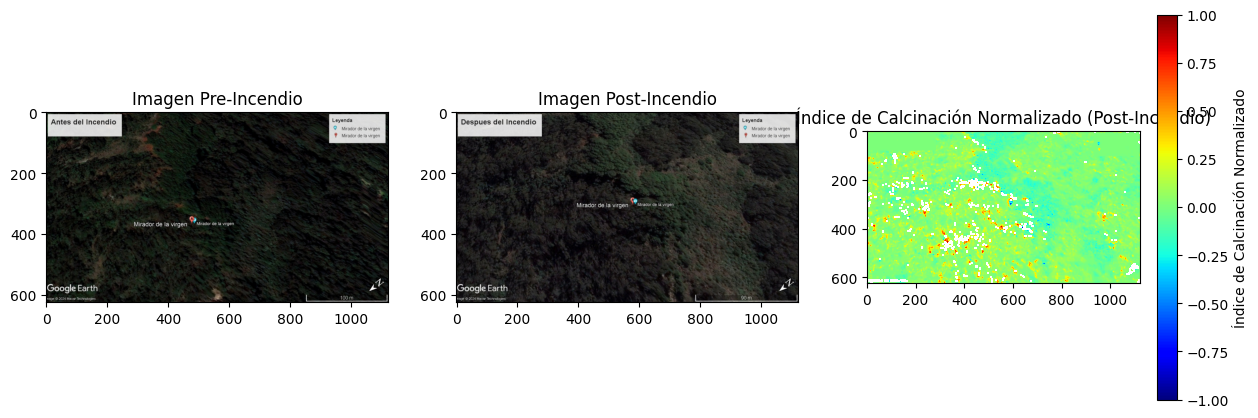

In [93]:
# Visualizar los resultados
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img_pre_fire, cv2.COLOR_BGR2RGB))
plt.title('Imagen Pre-Incendio')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(img_post_fire, cv2.COLOR_BGR2RGB))
plt.title('Imagen Post-Incendio')

plt.subplot(1, 3, 3)
plt.imshow(nci_post_fire, cmap='jet')
plt.colorbar(label='Índice de Calcinación Normalizado')
plt.title('Índice de Calcinación Normalizado (Post-Incendio)')

plt.show()

**calcular el Índice Normalizado de Diferencia de Quemaduras (NBR)**

<ipython-input-94-44c5cb2c8658>:6: RuntimeWarning: invalid value encountered in divide
  nbr_post_fire = (nir_band - swir_band) / (nir_band + swir_band)


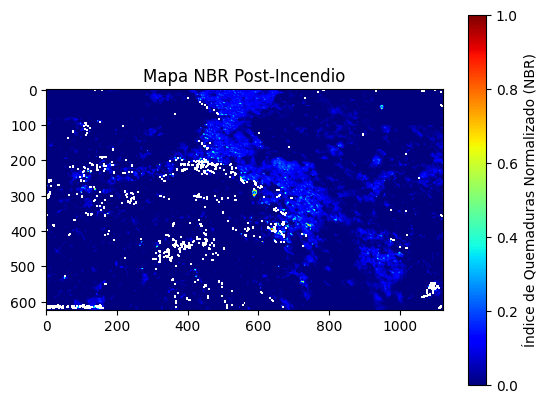

In [94]:
# Definir las bandas NIR y SWIR
nir_band = img_post_fire[:,:,1].astype(np.float32)
swir_band = img_post_fire[:,:,2].astype(np.float32)

# Calcular el NBR
nbr_post_fire = (nir_band - swir_band) / (nir_band + swir_band)

# Definir la paleta de colores
palette = ['#7F0010', '#D99143', '#E02E20', '#EC6521', '#F6D53B']

# Visualizar el NBR
plt.imshow(nbr_post_fire, cmap='jet', vmin=0.0, vmax=1.0)
plt.colorbar(label='Índice de Quemaduras Normalizado (NBR)')
plt.title('Mapa NBR Post-Incendio')
plt.show()

<ipython-input-95-97b292dc3613>:6: RuntimeWarning: invalid value encountered in divide
  nbr_pre_fire = (nir_pre_fire - swir_pre_fire) / (nir_pre_fire + swir_pre_fire)


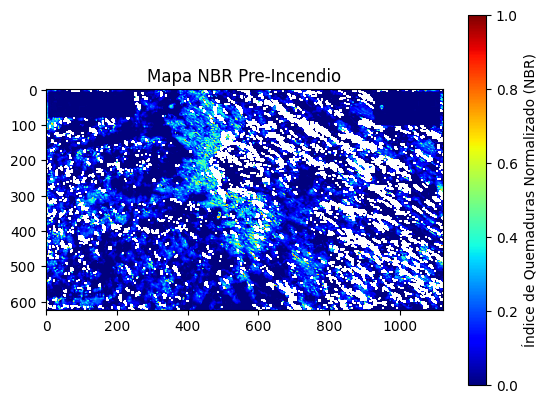

In [95]:
# Definir las bandas NIR y SWIR para la imagen antes del incendio
nir_pre_fire = img_pre_fire[:,:,1].astype(np.float32)
swir_pre_fire = img_pre_fire[:,:,2].astype(np.float32)

# Calcular el NBR antes del incendio
nbr_pre_fire = (nir_pre_fire - swir_pre_fire) / (nir_pre_fire + swir_pre_fire)

# Visualizar el NBR antes del incendio
plt.imshow(nbr_pre_fire, cmap='jet', vmin=0.0, vmax=1.0)
plt.colorbar(label='Índice de Quemaduras Normalizado (NBR)')
plt.title('Mapa NBR Pre-Incendio')
plt.show()


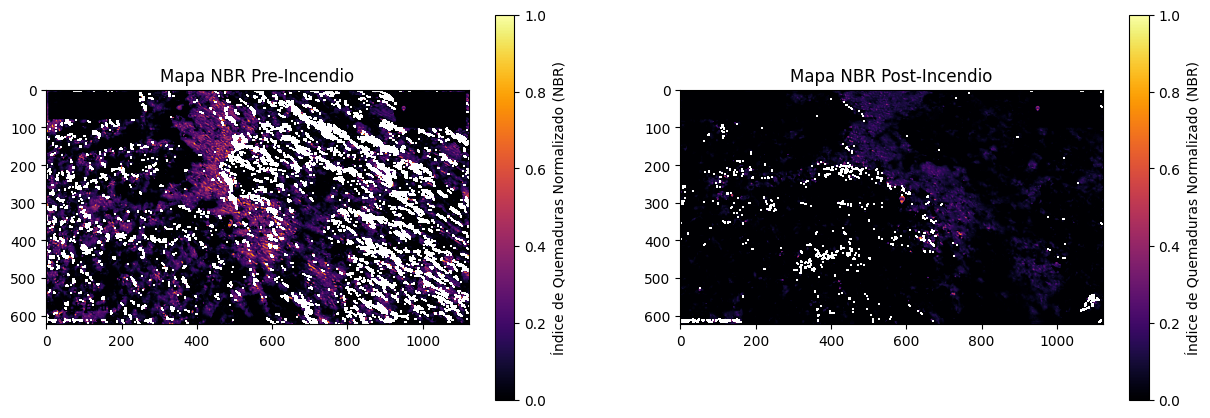

In [96]:
# Visualizar tanto el NBR antes como después del incendio en el mismo bloque
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.imshow(nbr_pre_fire, cmap='inferno', vmin=0.0, vmax=1.0)
plt.colorbar(label='Índice de Quemaduras Normalizado (NBR)')
plt.title('Mapa NBR Pre-Incendio')

plt.subplot(1, 2, 2)
plt.imshow(nbr_post_fire, cmap='inferno', vmin=0.0, vmax=1.0)
plt.colorbar(label='Índice de Quemaduras Normalizado (NBR)')
plt.title('Mapa NBR Post-Incendio')

plt.show()


**Cuantificación del Area**

In [97]:
# Calcular la diferencia entre las imágenes en escala de grises
diff = cv2.absdiff(gray_pre_fire, gray_post_fire)

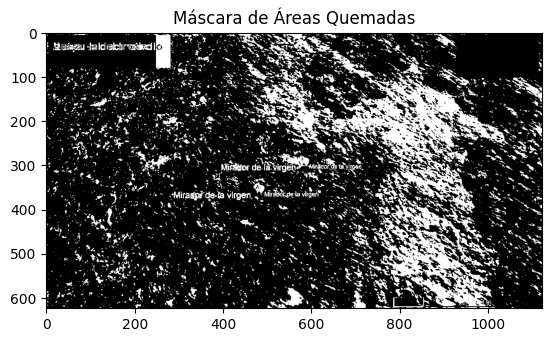

In [98]:
# Aplicar un umbral para obtener las áreas quemadas
_, burned_area_mask = cv2.threshold(diff, 30, 255, cv2.THRESH_BINARY)

# Visualizar la máscara de áreas quemadas
plt.imshow(burned_area_mask, cmap='gray')
plt.title('Máscara de Áreas Quemadas')
plt.show()

In [99]:
pixel_area = 1  # en metros cuadrados (ajusta según la resolución de tus imágenes)

# Calcular el número de píxeles quemados
num_burned_pixels = np.sum(burned_area_mask > 0)

# Calcular el área quemada en metros cuadrados
burned_area = num_burned_pixels * pixel_area  # en metros cuadrados

# Convertir el área a hectáreas (1 hectárea = 10,000 metros cuadrados)
burned_area_hectares = burned_area / 10000

# Imprimir el área quemada
print(f"Área quemada: {burned_area:.2f} metros cuadrados")
print(f"Área quemada: {burned_area_hectares:.2f} hectáreas")

Área quemada: 148451.00 metros cuadrados
Área quemada: 14.85 hectáreas


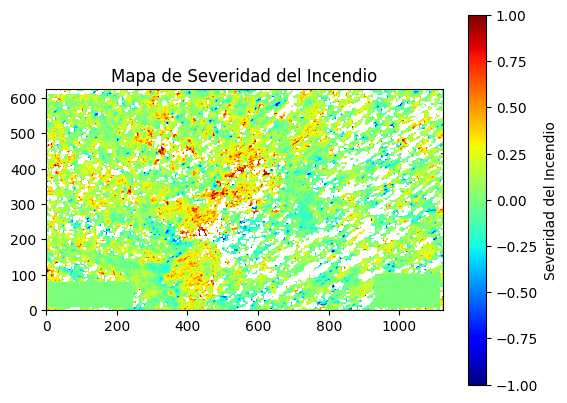

In [100]:
# Calcular el índice de severidad del incendio
severity_index = nbr_pre_fire - nbr_post_fire

# Definir una paleta de colores para el índice de severidad
palette_severity = ['011301', '011D01', '012E01', '023B01', '004C00', '056201',
                    '207401', '3E8601', '529400', '74A901', '99B718', 'FCD163',
                    'F1B555', 'DF923D', 'CE7E45', '66A000']

# Visualizar el índice de severidad del incendio
plt.imshow(severity_index, cmap='jet', vmin=-1.0, vmax=1.0)
plt.colorbar(label='Severidad del Incendio')
plt.title('Mapa de Severidad del Incendio')

# Centrar la vista en una de las imágenes y asignar un valor de zoom
plt.xlim(0, severity_index.shape[1])
plt.ylim(0, severity_index.shape[0])
plt.axis('on')  # Mostrar ejes
plt.grid(False)  # Ocultar cuadrícula

plt.show()


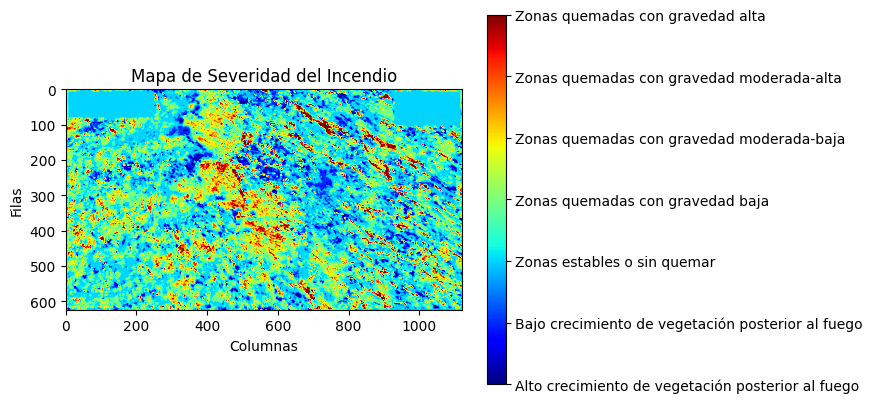

In [101]:
# Definir los intervalos y etiquetas de gravedad del incendio según el NBR
severity_intervals = [-np.inf, -0.25, -0.1, 0.1, 0.27, 0.44, 0.66, np.inf]
severity_labels = ['Alto crecimiento de vegetación posterior al fuego',
                   'Bajo crecimiento de vegetación posterior al fuego',
                   'Zonas estables o sin quemar',
                   'Zonas quemadas con gravedad baja',
                   'Zonas quemadas con gravedad moderada-baja',
                   'Zonas quemadas con gravedad moderada-alta',
                   'Zonas quemadas con gravedad alta']

# Aplicar etiquetas de gravedad del incendio según el NBR
severity_index_labeled = np.digitize(severity_index, severity_intervals)

# Visualizar el índice de severidad del incendio con etiquetas de gravedad
plt.imshow(severity_index_labeled, cmap='jet', vmin=1, vmax=len(severity_labels))
cbar = plt.colorbar(ticks=range(1, len(severity_labels)+1))
cbar.ax.set_yticklabels(severity_labels)
plt.title('Mapa de Severidad del Incendio')
plt.xlabel('Columnas')
plt.ylabel('Filas')
plt.grid(False)
plt.show()


In [102]:
# Calcular el porcentaje de daño en la vegetación
total_pixels = severity_index.size
damage_pixels = np.count_nonzero(severity_index > 0)
vegetation_damage_percentage = (damage_pixels / total_pixels) * 100

In [103]:
# Imprimir todos los datos relevantes
print("Resumen del Incendio:")
print("*************")
print(f"Número total de píxeles analizados: {total_pixels}")
print(f"Número de píxeles con daño en la vegetación: {damage_pixels}")
print(f"Porcentaje de daño en la vegetación: {vegetation_damage_percentage:.2f}%")
print("\nIntervalos de Gravedad del Incendio (NBR):")
print("--------------------------------------------")
for i, label in enumerate(severity_labels):
    lower_bound = severity_intervals[i]
    upper_bound = severity_intervals[i+1]
    print(f"{lower_bound:.2f} - {upper_bound:.2f}: {label}")

# Imprimir el Índice de Calcinación Normalizado (NCI)
print("\nÍndice de Calcinación Normalizado (NCI):")
print("------------------------------------------")
print("Este índice describe las zonas afectadas por el fuego. Valores positivos indican")
print("mayor severidad del incendio.")

# Imprimir la severidad del incendio
print("\nSeveridad del Incendio:")
print("------------------------")
print("Los valores del índice de severidad del incendio se asignan a intervalos de gravedad")
print("y se etiquetan según la gravedad del incendio basada en el NBR.")


Resumen del Incendio:
*************
Número total de píxeles analizados: 700752
Número de píxeles con daño en la vegetación: 442491
Porcentaje de daño en la vegetación: 63.15%

Intervalos de Gravedad del Incendio (NBR):
--------------------------------------------
-inf - -0.25: Alto crecimiento de vegetación posterior al fuego
-0.25 - -0.10: Bajo crecimiento de vegetación posterior al fuego
-0.10 - 0.10: Zonas estables o sin quemar
0.10 - 0.27: Zonas quemadas con gravedad baja
0.27 - 0.44: Zonas quemadas con gravedad moderada-baja
0.44 - 0.66: Zonas quemadas con gravedad moderada-alta
0.66 - inf: Zonas quemadas con gravedad alta

Índice de Calcinación Normalizado (NCI):
------------------------------------------
Este índice describe las zonas afectadas por el fuego. Valores positivos indican
mayor severidad del incendio.

Severidad del Incendio:
------------------------
Los valores del índice de severidad del incendio se asignan a intervalos de gravedad
y se etiquetan según la gravedad 